In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
tracks_df = pd.read_csv("Best Songs on Spotify from 2000-2023.csv", delimiter=';')

In [4]:
tracks_df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [5]:
tracks_df.shape        

(2385, 14)

In [6]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2385 non-null   object
 1   artist         2385 non-null   object
 2   top genre      2385 non-null   object
 3   year           2385 non-null   int64 
 4   bpm            2385 non-null   int64 
 5   energy         2385 non-null   int64 
 6   danceability   2385 non-null   int64 
 7   dB             2385 non-null   int64 
 8   liveness       2385 non-null   int64 
 9   valence        2385 non-null   int64 
 10  duration       2385 non-null   int64 
 11  acousticness   2385 non-null   int64 
 12  speechiness    2385 non-null   int64 
 13  popularity     2385 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 261.0+ KB


In [7]:
tracks_df.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000
mean,2011.11698,119.78365,69.79245,67.03480,-5.77149,17.78700,54.23396,225.94675,15.61300,10.11237,70.52662
std,6.74836,27.27308,16.16461,13.71905,2.07215,13.62929,22.45808,43.22670,20.27775,9.52082,11.41974
min,1985.00000,60.00000,6.00000,18.00000,-18.00000,2.00000,4.00000,115.00000,0.00000,2.00000,5.00000
25%,2005.00000,98.00000,59.00000,59.00000,-7.00000,9.00000,37.00000,200.00000,2.00000,4.00000,64.00000
50%,2011.00000,120.00000,71.00000,68.00000,-5.00000,12.00000,54.00000,221.00000,7.00000,6.00000,72.00000
75%,2017.00000,134.00000,82.00000,77.00000,-4.00000,23.00000,73.00000,246.00000,22.00000,12.00000,79.00000
max,2023.00000,211.00000,100.00000,98.00000,0.00000,84.00000,97.00000,688.00000,98.00000,58.00000,98.00000


In [25]:
tracks_df =tracks_df[tracks_df['year']>=2000]

In [26]:
tracks_df.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000,2338.00000
mean,2011.37083,119.78956,69.67836,66.99487,-5.76091,17.78229,54.04277,225.62831,15.61762,10.15355,70.52395
std,6.56482,27.30081,16.15387,13.74055,2.06270,13.63065,22.37669,43.27123,20.35357,9.53762,11.47286
min,2000.00000,60.00000,6.00000,18.00000,-18.00000,2.00000,4.00000,115.00000,0.00000,2.00000,5.00000
25%,2006.00000,98.00000,59.00000,59.00000,-7.00000,9.00000,37.00000,200.00000,2.00000,4.00000,64.00000
50%,2012.00000,120.00000,71.00000,68.00000,-5.00000,12.00000,54.00000,221.00000,7.00000,6.00000,72.00000
75%,2017.00000,134.00000,82.00000,77.00000,-4.00000,23.00000,72.00000,245.00000,22.00000,12.00000,79.00000
max,2023.00000,211.00000,100.00000,98.00000,0.00000,84.00000,97.00000,688.00000,98.00000,58.00000,98.00000


In [27]:
tracks_df.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
dtype: int64

In [28]:
tracks_df.nunique()

title            2216
artist            994
top genre         265
year               24
bpm               136
energy             87
danceability       79
dB                 19
liveness           79
valence            94
duration          233
acousticness       96
speechiness        52
popularity         81
dtype: int64

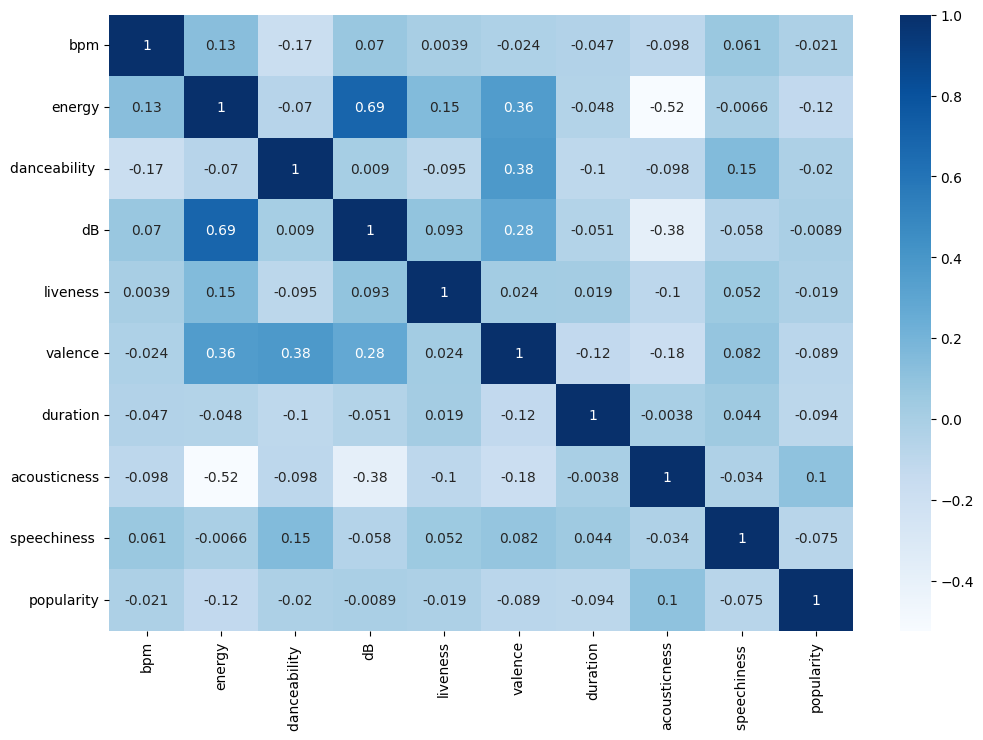

In [31]:

corr = tracks_df.loc[:,"bpm":"popularity"].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

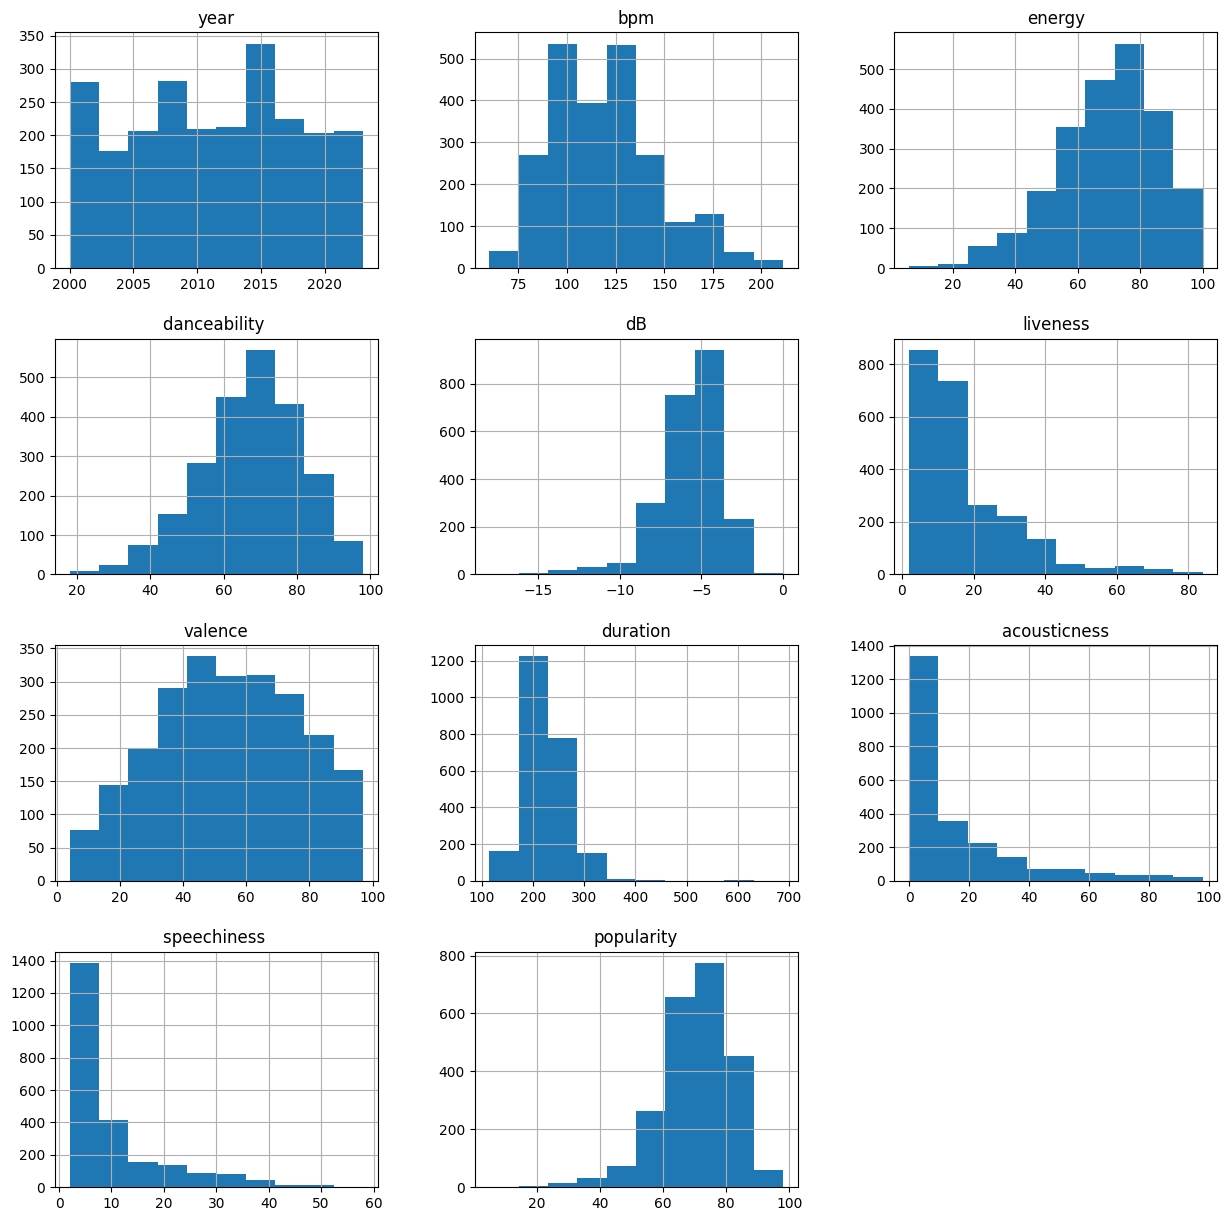

In [32]:
tracks_df.loc[:,"year":"popularity"].hist(figsize=(15,15));

In [33]:
tracks_df.to_csv("tracks_2000.csv")